In [1]:
# pip install pywaffle
from pywaffle import Waffle
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read in California data

In [2]:
ca_wine = pd.read_csv("just_CA_wineries.csv")
ca_wine["x"] = (180+ca_wine["Longitude"])*10
ca_wine["y"] = (90-ca_wine["Latitude"])*10
ca_wine["country"] = "california"

# remove an extreme Mojave Desert outlier
ca_wine = ca_wine.drop(ca_wine[ca_wine["x"]==680.0044300000001].index)

west_ca = np.min(ca_wine["x"])
east_ca = np.max(ca_wine["x"])
south_ca = np.max(ca_wine["y"])
north_ca = np.min(ca_wine["y"])

# Read in Mexico data

In [3]:
mex_wine_list = [

# Guanajuato, https://rutadelvinoguanajuato.com.mx/
[20.7881469277426, -100.80576668924073, "guanajuato"], # Rinconcillo de los Remedios
[20.794759139638582, -100.80153988924054, "guanajuato"], # Viñedo San miguel
[21.307300898910405, -100.89113585670066, "guanajuato"], # Viñedo Los Arcángeles
[21.186357324629665, -100.8882028413621, "guanajuato"], # Hacienda San Bernardino
[21.136493707435214, -100.86594583582247, "guanajuato"], # Santísima Trinidad
[21.208309015560925, -100.85168854505545, "guanajuato"], # Cuna de Tierra
[21.085179322357927, -100.8003910217635, "guanajuato"], # Tres Raíces
[20.952318291609714, -100.74966607020237, "guanajuato"], # Puente Josefa
[20.89888517261171, -100.66528312877256, "guanajuato"], # Viñedo San Francisco
[20.908549205589157, -100.67919085116841, "guanajuato"], # Bodega Dos Búhos
[20.944308600075576, -100.81568461991964, "guanajuato"], # San José La Vista
[20.91968286981732, -100.61286559534457, "guanajuato"], # Viñedo Santa Catalina
[20.94192530342741, -100.75471582417933, "guanajuato"], # Los Senderos
[20.90922579402611, -100.67181590273232, "guanajuato"], # Vinícola Toyan
[20.91766308833926, -100.65287975107393, "guanajuato"], # Viñedos San Lucas

# Queretaro, https://viñedosqueretaro.com
[20.637750534676456, -99.90174799069212, "queretaro"], # La Redonda
[20.70043657736079, -100.20021256651388, "queretaro"], # Puerta del Lobo
[20.696297028595158, -99.87988539076188, "queretaro"], # Bodega De Cote
[20.544940317236627, -99.95224193711591, "queretaro"], # Bodegas Norte B
[20.596226467783787, -99.83394752201357, "queretaro"], # Bodegas Vaivén
[20.432428303886322, -100.35142117947454, "queretaro"], # Casa Vegil
[20.455029859102257, -100.08776101977423, "queretaro"], # Cava 57
[20.697180208613666, -99.96294302787827, "queretaro"], # Cavas Donato
[20.608146615404216, -100.27873695486849, "queretaro"], # Finca Ancestra
[20.697567526749186, -99.87685497020773, "queretaro"], # Finca Sala Vivé by Freixenet
[20.77019520191353, -100.2394651720531, "queretaro"], # Hacienda Atongo
[20.67621898575708, -99.80537295486707, "queretaro"], # Hacienda Tovares
[20.50567165984719, -100.23524575856445, "queretaro"], # La Terquedad
[20.57177126151921, -100.20500361550661, "queretaro"], # María y Bernardo
[20.684763551199758, -99.98065824932625, "queretaro"], # Paso de Serra, Viñedos y Bodega
[20.508971996895045, -100.35231414507017, "queretaro"], # Solariega
[20.598042896497475, -100.12289381253925, "queretaro"], # Tierra de Alonso
[20.70350640889606, -99.9474270432192, "queretaro"], # Tierra de Peña
[20.71394961640613, -99.80991314691282, "queretaro"], # Viña del Cielo
[20.53975961697781, -99.93086389904622, "queretaro"], # Viña Magal
[20.551621133190874, -99.94600932603439, "queretaro"], # Viñedo La Revuelta
[20.583430783774297, -99.90167899350462, "queretaro"], # Viñedo Los Rosales
[20.69473651248878, -99.87017870827758, "queretaro"], # Viñedos Azteca
[20.64240446156959, -100.22385789109069, "queretaro"], # Viñedos del Polo
[20.66427589839685, -99.98206064322004, "queretaro"], # Viñedos Vinaltura
[20.63258707605902, -99.97106233157335, "queretaro"], # Vinícola San Juanito
[20.5344848410111, -99.87884117575176, "queretaro"], # Compañia Vinicola San Patricio
[20.53104688629966, -99.90229071495341, "queretaro"], # Vinícola Tequisquiapan
[20.762742654372623, -100.27801032418307, "queretaro"], # Vinos del Marqués

# Coahuila, https://vinosydinos.com/
[25.264009388181055, -101.21778637866095, "coahuila"], # San Juan de la Vaquería
[25.283852501003384, -101.90506288846676, "coahuila"], # Viñedos Don Leo
[25.276935703243893, -100.80488135096853, "coahuila"], # Bodega Los Cedros
[25.486543434224476, -102.02075882525537, "coahuila"], # Bodega Rivero González
[25.21963639507099, -100.82227895097006, "coahuila"], # Bodegas del Viento
[25.429670478728884, -100.55753318536271, "coahuila"], # Viñedos Blanc, Alto de San Juan
[25.54011818315328, -102.02419281981764, "coahuila"], # Casa Madero

# Aguascalientes, https://www.vivaaguascalientes.com/
[22.161398059755665, -102.30676603909383, "aguascalientes"], # Vinícola Chacón
[22.115302511832716, -102.29208611211234, "aguascalientes"], # Viña Las Cruces
[21.826748775770525, -102.31381605630101, "aguascalientes"], # Viñedos Santa Mónica
[21.94398515892942, -102.32450310648717, "aguascalientes"], # Bodegas Bonart
[22.05338510095917, -102.25388212745882, "aguascalientes"], # Viñedos Iberia
[22.081419256185306, -102.32776733344554, "aguascalientes"], # Vinicola el Aguaje
[22.03774288915605, -102.06232880840736, "aguascalientes"], # Finca Renacimiento
[22.095465774861736, -102.28845588020982, "aguascalientes"], # Vinicola Santa Elena de Aguascalientes
[22.13757481772872, -102.29179254012787, "aguascalientes"], # Hacienda de Letras
[22.31114206422794, -102.29002481025361, "aguascalientes"], # Vinícola El Secreto
[21.89577763298551, -102.38049485444571, "aguascalientes"], # Viñedos Tierra Tinta
[22.052335726743983, -102.29420956978642, "aguascalientes"], # Bodegas Origen
[21.896933931289002, -102.38292393302348, "aguascalientes"], # Praon de María
[21.895250968913892, -102.38291233724729, "aguascalientes"], # Vinícola Santossca
[21.898474719581653, -102.38313801582505, "aguascalientes"], # Bodegas de la Parra
[22.363847217390575, -102.29495027719231, "aguascalientes"], # Viñedos el Potrerito
[22.207446241634866, -102.29219159491156, "aguascalientes"], # FraGue Winery
[22.03325794954985, -102.1225225465113, "aguascalientes"], # Vinícola Casa de Quesada
[21.976548067971873, -102.29127691633978, "aguascalientes"], # Viñedos Casa Leal

# Baja California, https://www.ensenada.travel/en/winecountry/wineries/
[32.13121002576777, -116.52532539042865, "baja california"], # Bruma Valle de Guadalupe
[32.11694539138643, -116.51774330577467, "baja california"], # L.A. CETTO - Vinícola
[32.11367050696313, -116.51073192533711, "baja california"], # La Casa de Doña Lupe
[32.1109446624223, -116.55141917322884, "baja california"], # Encuentro Guadalupe
[32.09875693813883, -116.5740281462476, "baja california"], # Viñedos Malagón
[32.09658144180144, -116.57076774439285, "baja california"], # Rancho El Gran Rosario
[32.092235815241736, -116.57746538486539, "baja california"], # Shedeh Vinícola
[32.10228216133074, -116.63798618301017, "baja california"], # Decantos Vinicola
[31.945809137324943, -116.66639438116053, "baja california"], # Vinícola Vintango
[32.106125910778125, -116.62319618671988, "baja california"], # Vinos Shimul
[32.074873681412214, -116.62464743534127, "baja california"], # Quinta Monasterio
[32.101961831440384, -116.6121584253374, "baja california"], # TREVISTA Vineyards
[32.09908570501604, -116.6096124174113, "baja california"], # Vinicola Torres Alegre y Familia
[32.0991771823361, -116.63346451555641, "baja california"], # Baron Balch'e
[32.07531154049885, -116.6234440578844, "baja california"], # JC Bravo vineyard
[32.08741018307186, -116.64878361741168, "baja california"], # Bodegas F. Rubio
[32.08910261991853, -116.64013649042998, "baja california"], # Viña Emiliana
[32.09412198012166, -116.6329515174114, "baja california"], # Casta de Vinos
[32.090003656431044, -116.6294043174116, "baja california"], # Vinos Emevé
[32.08534782552257, -116.62246678301081, "baja california"], # Vinicola Adobe Guadalupe
[32.079550524854156, -116.61128994624825, "baja california"], # Wine factory
[32.069069524981415, -116.6536925118478, "baja california"], # Finca La Carrodilla
[32.05728376873499, -116.6487841944574, "baja california"], # El Cielo Valle de Guadalupe
[32.053679952522984, -116.66570042533904, "baja california"], # Villa Montefiori
[32.05194237535444, -116.65980564624923, "baja california"], # Vinos Bibayoff
[32.04914846692604, -116.66005499279308, "baja california"], # Vinos PasionBiba
[32.041066864104096, -116.6510485541759, "baja california"], # Vena Cava Vinícola
[32.03978152033156, -116.67109589228653, "baja california"], # Hilo Negro Viñedos y Bodega
[32.02744450772755, -116.67141404439525, "baja california"], # Vinos Pijoan
[32.01715751783699, -116.66293240392316, "baja california"], # Lomita
[32.011123946275326, -116.64354637137724, "baja california"], # Vinos Xecue
[32.00242803754325, -116.6693878388315, "baja california"], # AlXimia Vino Elemental
[31.990294055921673, -116.67190033362643, "baja california"], # En'kanto Winery
[32.038424385043214, -116.67382663275887, "baja california"], # Cava Mora
[32.059806478343454, -116.5910812523204, "baja california"], # Lechuza Vineyard
[32.042503789862124, -116.60154961320058, "baja california"], # Cieli Winery
[32.03604678905921, -116.60206969650325, "baja california"], # Deckman´s en el Mogor
[32.03268888075155, -116.61000205232132, "baja california"], # Vinicola Castillo Ferrer
[32.01509712151968, -116.62570700021362, "baja california"], # Clos de Tres Cantos
[32.00226656997041, -116.61211567289844, "baja california"], # Casa Encinares
[31.99546875659242, -116.62576117508763, "baja california"], # Cava Maciel
[31.982781779251596, -116.64018309650494, "baja california"], # Fratelli Pasini SA de CV
[31.989773939421493, -116.6255038833409, "baja california"], # La Casa Vieja
[31.979127685776497, -116.65236182163187, "baja california"], # Aborigen Vinicola
[31.973801975102862, -116.66065543226179, "baja california"], # Bodegas De Santo Tomas
[31.965080914950708, -116.65500038301488, "baja california"], # Vinedos Mina Penelope
[31.905427093368065, -116.23420140021727, "baja california"], # Vinicola Infinito
[31.950778523916455, -116.71265601106838, "baja california"], # CuatroCuatros
[31.90662160726829, -116.69749745974487, "baja california"], # Legado Sais, Vinícola
[31.893290411387174, -116.26953361185352, "baja california"], # Bodegas San Rafael
[32.1178600046746, -116.58235253864015, "baja california"], # Château Camou
[31.685628278034248, -116.51293340629601, "baja california"], # San Cosme Viñedos
[31.641717217472628, -116.43970374811764, "baja california"], # MD Vinos
[31.61505231543051, -116.44030961928209, "baja california"], # Vinicola Aldo Cesar Palafox

# Zacatecas, google search
[22.735063139820507, -102.37695694720759, "zacatecas"], # Tierra adentro, Campo Real
[22.52607523928711, -102.26537705315575, "zacatecas"], # Viñedos el alpino
[22.52004965675725, -102.31687546386445, "zacatecas"], # Viñedo la Karla
[22.497213484444927, -102.2880363534199, "zacatecas"], # Viñedos los almendros
[22.415035544065827, -102.22864151846673, "zacatecas"] # Vinicola Luevano Ruiz Valle de Barranquillas
]

mex_wine = pd.DataFrame(mex_wine_list, columns=["Latitude","Longitude", "state"])
mex_wine["x"] = (180+mex_wine["Longitude"])*10
mex_wine["y"] = (90-mex_wine["Latitude"])*10

west_mex = np.min(mex_wine["x"])
east_mex = np.max(mex_wine["x"])
south_mex = np.max(mex_wine["y"])
north_mex = np.min(mex_wine["y"])

mex_wine["country"] = "mexico"


# Combine California and Mexico data

In [4]:
all_data = pd.concat([ca_wine, mex_wine], ignore_index=True)

# Current climate map analysis

In [5]:
current_map = Image.open('current_map.tif')
current_arr = np.array(current_map)

curr_map_climate = []
curr_map_colors = []

for i in range(len(all_data)):

    curr_vin = all_data.iloc[i]
    curr_x = int(np.round(curr_vin["x"]))
    curr_y = int(np.round(curr_vin["y"]))
    curr_map_val = current_arr[curr_y][curr_x]

    if curr_map_val==1:
        climate = "Tropical, rainforest"
        hexcol = '#{:02x}{:02x}{:02x}'.format(0, 0, 255)
    elif curr_map_val==2:
        climate = "Tropical, monsoon"
        hexcol = '#{:02x}{:02x}{:02x}'.format(0, 120, 255)
    elif curr_map_val==3:
        climate = "Tropical, savannah"
        hexcol = '#{:02x}{:02x}{:02x}'.format(70, 170, 250)
    elif curr_map_val==4:
        climate = "Arid, desert, hot"
        hexcol = '#{:02x}{:02x}{:02x}'.format(255, 0, 0)
    elif curr_map_val==5:
        climate = "Arid, desert, cold"
        hexcol = '#{:02x}{:02x}{:02x}'.format(255, 150, 150)
    elif curr_map_val==6:
        climate = "Arid, steppe, hot"
        hexcol = '#{:02x}{:02x}{:02x}'.format(245, 165, 0)
    elif curr_map_val==7:
        climate = "Arid, steppe, cold"
        hexcol = '#{:02x}{:02x}{:02x}'.format(255, 220, 100)
    elif curr_map_val==8:
        climate = "Temperate, dry summer, hot summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(255, 255, 0)
    elif curr_map_val==9:
        climate = "Temperate, dry summer, warm summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(200, 200, 0)
    elif curr_map_val==10:
        climate = "Temperate, dry summer, cold summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(150, 150, 0)
    elif curr_map_val==11:
        climate = "Temperate, dry winter, hot summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(150, 255, 150)
    elif curr_map_val==12:
        climate = "Temperate, dry winter, warm summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(100, 200, 100)
    elif curr_map_val==13:
        climate = "Temperate, dry winter, cold summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(50, 150, 50)
    elif curr_map_val==14:
        climate = "Temperate, no dry season, hot summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(200, 255, 80)
    elif curr_map_val==15:
        climate = "Temperate, no dry season, warm summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(100, 255, 80)
    elif curr_map_val==16:
        climate = "Temperate, no dry season, cold summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(50, 200, 0)
    elif curr_map_val==17:
        climate = "Cold, dry summer, hot summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(255, 0, 255)
    elif curr_map_val==18:
        climate = "Cold, dry summer, warm summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(200, 0, 200)
    elif curr_map_val==19:
        climate = "Cold, dry summer, cold summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(150, 50, 150)
    elif curr_map_val==20:
        climate = "Cold, dry summer, very cold winter"
        hexcol = '#{:02x}{:02x}{:02x}'.format(150, 100, 150)
    elif curr_map_val==21:
        climate = "Cold, dry winter, hot summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(170, 175, 255)
    elif curr_map_val==22:
        climate = "Cold, dry winter, warm summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(90, 120, 220)
    elif curr_map_val==23:
        climate = "Cold, dry winter, cold summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(75, 80, 180)
    elif curr_map_val==24:
        climate = "Cold, dry winter, very cold winter"
        hexcol = '#{:02x}{:02x}{:02x}'.format(50, 0, 135)
    elif curr_map_val==25:
        climate = "Cold, no dry season, hot summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(0, 255, 255)
    elif curr_map_val==26:
        climate = "Cold, no dry season, warm summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(55, 200, 255)
    elif curr_map_val==27:
        climate = "Cold, no dry season, cold summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(0, 125, 125)
    elif curr_map_val==28:
        climate = "Cold, no dry season, very cold winter"
        hexcol = '#{:02x}{:02x}{:02x}'.format(0, 70, 95)
    elif curr_map_val==29:
        climate = "Polar, tundra"
        hexcol = '#{:02x}{:02x}{:02x}'.format(178, 178, 178)
    elif curr_map_val==30:
        climate = "Polar, frost"
        hexcol = '#{:02x}{:02x}{:02x}'.format(102, 102, 102)

    curr_map_climate.append(climate)
    curr_map_colors.append(hexcol)
    
all_data_current = all_data
    
all_data_current["curr_map_climate"] = curr_map_climate
all_data_current["curr_map_colors"] = curr_map_colors

just_ca= all_data_current[all_data["country"]=="california"]
just_mex = all_data_current[all_data["country"]=="mexico"]

curr_map_table_ca = just_ca.groupby(by=["curr_map_climate", "curr_map_colors"]).size().reset_index(name="frequency")
curr_map_table_mex = just_mex.groupby(by=["curr_map_climate", "curr_map_colors"]).size().reset_index(name="frequency")

curr_map_table_ca.sort_values(by=["frequency"], ignore_index=True, inplace=True)
curr_map_table_mex.sort_values(by=["frequency"], ignore_index=True, inplace=True)
    

# Köppen-Geiger Shared Socioeconomic Pathways 1, radiative forcing 1.9 W/m2


In [6]:
current_map = Image.open('2041_2070_ssp1_rf19.tif')
current_arr = np.array(current_map)

curr_map_climate = []
curr_map_colors = []

for i in range(len(all_data)):

    curr_vin = all_data.iloc[i]
    curr_x = int(np.round(curr_vin["x"]))
    curr_y = int(np.round(curr_vin["y"]))
    curr_map_val = current_arr[curr_y][curr_x]

    if curr_map_val==1:
        climate = "Tropical, rainforest"
        hexcol = '#{:02x}{:02x}{:02x}'.format(0, 0, 255)
    elif curr_map_val==2:
        climate = "Tropical, monsoon"
        hexcol = '#{:02x}{:02x}{:02x}'.format(0, 120, 255)
    elif curr_map_val==3:
        climate = "Tropical, savannah"
        hexcol = '#{:02x}{:02x}{:02x}'.format(70, 170, 250)
    elif curr_map_val==4:
        climate = "Arid, desert, hot"
        hexcol = '#{:02x}{:02x}{:02x}'.format(255, 0, 0)
    elif curr_map_val==5:
        climate = "Arid, desert, cold"
        hexcol = '#{:02x}{:02x}{:02x}'.format(255, 150, 150)
    elif curr_map_val==6:
        climate = "Arid, steppe, hot"
        hexcol = '#{:02x}{:02x}{:02x}'.format(245, 165, 0)
    elif curr_map_val==7:
        climate = "Arid, steppe, cold"
        hexcol = '#{:02x}{:02x}{:02x}'.format(255, 220, 100)
    elif curr_map_val==8:
        climate = "Temperate, dry summer, hot summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(255, 255, 0)
    elif curr_map_val==9:
        climate = "Temperate, dry summer, warm summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(200, 200, 0)
    elif curr_map_val==10:
        climate = "Temperate, dry summer, cold summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(150, 150, 0)
    elif curr_map_val==11:
        climate = "Temperate, dry winter, hot summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(150, 255, 150)
    elif curr_map_val==12:
        climate = "Temperate, dry winter, warm summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(100, 200, 100)
    elif curr_map_val==13:
        climate = "Temperate, dry winter, cold summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(50, 150, 50)
    elif curr_map_val==14:
        climate = "Temperate, no dry season, hot summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(200, 255, 80)
    elif curr_map_val==15:
        climate = "Temperate, no dry season, warm summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(100, 255, 80)
    elif curr_map_val==16:
        climate = "Temperate, no dry season, cold summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(50, 200, 0)
    elif curr_map_val==17:
        climate = "Cold, dry summer, hot summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(255, 0, 255)
    elif curr_map_val==18:
        climate = "Cold, dry summer, warm summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(200, 0, 200)
    elif curr_map_val==19:
        climate = "Cold, dry summer, cold summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(150, 50, 150)
    elif curr_map_val==20:
        climate = "Cold, dry summer, very cold winter"
        hexcol = '#{:02x}{:02x}{:02x}'.format(150, 100, 150)
    elif curr_map_val==21:
        climate = "Cold, dry winter, hot summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(170, 175, 255)
    elif curr_map_val==22:
        climate = "Cold, dry winter, warm summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(90, 120, 220)
    elif curr_map_val==23:
        climate = "Cold, dry winter, cold summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(75, 80, 180)
    elif curr_map_val==24:
        climate = "Cold, dry winter, very cold winter"
        hexcol = '#{:02x}{:02x}{:02x}'.format(50, 0, 135)
    elif curr_map_val==25:
        climate = "Cold, no dry season, hot summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(0, 255, 255)
    elif curr_map_val==26:
        climate = "Cold, no dry season, warm summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(55, 200, 255)
    elif curr_map_val==27:
        climate = "Cold, no dry season, cold summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(0, 125, 125)
    elif curr_map_val==28:
        climate = "Cold, no dry season, very cold winter"
        hexcol = '#{:02x}{:02x}{:02x}'.format(0, 70, 95)
    elif curr_map_val==29:
        climate = "Polar, tundra"
        hexcol = '#{:02x}{:02x}{:02x}'.format(178, 178, 178)
    elif curr_map_val==30:
        climate = "Polar, frost"
        hexcol = '#{:02x}{:02x}{:02x}'.format(102, 102, 102)

    curr_map_climate.append(climate)
    curr_map_colors.append(hexcol)
    
all_data_ssp1 = all_data
    
all_data_ssp1["curr_map_climate"] = curr_map_climate
all_data_ssp1["curr_map_colors"] = curr_map_colors

just_ca= all_data_ssp1[all_data["country"]=="california"]
just_mex = all_data_ssp1[all_data["country"]=="mexico"]

ssp1_map_table_ca = just_ca.groupby(by=["curr_map_climate", "curr_map_colors"]).size().reset_index(name="frequency")
ssp1_map_table_mex = just_mex.groupby(by=["curr_map_climate", "curr_map_colors"]).size().reset_index(name="frequency")

ssp1_map_table_ca.sort_values(by=["frequency"], ignore_index=True, inplace=True)
ssp1_map_table_mex.sort_values(by=["frequency"], ignore_index=True, inplace=True)


# Köppen-Geiger Shared Socioeconomic Pathways 5, radiative forcing 8.5 W/m2

In [7]:
current_map = Image.open('2041_2070_ssp5_rf85.tif')
current_arr = np.array(current_map)

curr_map_climate = []
curr_map_colors = []

for i in range(len(all_data)):

    curr_vin = all_data.iloc[i]
    curr_x = int(np.round(curr_vin["x"]))
    curr_y = int(np.round(curr_vin["y"]))
    curr_map_val = current_arr[curr_y][curr_x]

    if curr_map_val==1:
        climate = "Tropical, rainforest"
        hexcol = '#{:02x}{:02x}{:02x}'.format(0, 0, 255)
    elif curr_map_val==2:
        climate = "Tropical, monsoon"
        hexcol = '#{:02x}{:02x}{:02x}'.format(0, 120, 255)
    elif curr_map_val==3:
        climate = "Tropical, savannah"
        hexcol = '#{:02x}{:02x}{:02x}'.format(70, 170, 250)
    elif curr_map_val==4:
        climate = "Arid, desert, hot"
        hexcol = '#{:02x}{:02x}{:02x}'.format(255, 0, 0)
    elif curr_map_val==5:
        climate = "Arid, desert, cold"
        hexcol = '#{:02x}{:02x}{:02x}'.format(255, 150, 150)
    elif curr_map_val==6:
        climate = "Arid, steppe, hot"
        hexcol = '#{:02x}{:02x}{:02x}'.format(245, 165, 0)
    elif curr_map_val==7:
        climate = "Arid, steppe, cold"
        hexcol = '#{:02x}{:02x}{:02x}'.format(255, 220, 100)
    elif curr_map_val==8:
        climate = "Temperate, dry summer, hot summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(255, 255, 0)
    elif curr_map_val==9:
        climate = "Temperate, dry summer, warm summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(200, 200, 0)
    elif curr_map_val==10:
        climate = "Temperate, dry summer, cold summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(150, 150, 0)
    elif curr_map_val==11:
        climate = "Temperate, dry winter, hot summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(150, 255, 150)
    elif curr_map_val==12:
        climate = "Temperate, dry winter, warm summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(100, 200, 100)
    elif curr_map_val==13:
        climate = "Temperate, dry winter, cold summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(50, 150, 50)
    elif curr_map_val==14:
        climate = "Temperate, no dry season, hot summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(200, 255, 80)
    elif curr_map_val==15:
        climate = "Temperate, no dry season, warm summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(100, 255, 80)
    elif curr_map_val==16:
        climate = "Temperate, no dry season, cold summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(50, 200, 0)
    elif curr_map_val==17:
        climate = "Cold, dry summer, hot summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(255, 0, 255)
    elif curr_map_val==18:
        climate = "Cold, dry summer, warm summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(200, 0, 200)
    elif curr_map_val==19:
        climate = "Cold, dry summer, cold summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(150, 50, 150)
    elif curr_map_val==20:
        climate = "Cold, dry summer, very cold winter"
        hexcol = '#{:02x}{:02x}{:02x}'.format(150, 100, 150)
    elif curr_map_val==21:
        climate = "Cold, dry winter, hot summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(170, 175, 255)
    elif curr_map_val==22:
        climate = "Cold, dry winter, warm summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(90, 120, 220)
    elif curr_map_val==23:
        climate = "Cold, dry winter, cold summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(75, 80, 180)
    elif curr_map_val==24:
        climate = "Cold, dry winter, very cold winter"
        hexcol = '#{:02x}{:02x}{:02x}'.format(50, 0, 135)
    elif curr_map_val==25:
        climate = "Cold, no dry season, hot summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(0, 255, 255)
    elif curr_map_val==26:
        climate = "Cold, no dry season, warm summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(55, 200, 255)
    elif curr_map_val==27:
        climate = "Cold, no dry season, cold summer"
        hexcol = '#{:02x}{:02x}{:02x}'.format(0, 125, 125)
    elif curr_map_val==28:
        climate = "Cold, no dry season, very cold winter"
        hexcol = '#{:02x}{:02x}{:02x}'.format(0, 70, 95)
    elif curr_map_val==29:
        climate = "Polar, tundra"
        hexcol = '#{:02x}{:02x}{:02x}'.format(178, 178, 178)
    elif curr_map_val==30:
        climate = "Polar, frost"
        hexcol = '#{:02x}{:02x}{:02x}'.format(102, 102, 102)

    curr_map_climate.append(climate)
    curr_map_colors.append(hexcol)
    
all_data_ssp5 = all_data
    
all_data_ssp5["curr_map_climate"] = curr_map_climate
all_data_ssp5["curr_map_colors"] = curr_map_colors

just_ca= all_data_ssp5[all_data["country"]=="california"]
just_mex = all_data_ssp5[all_data["country"]=="mexico"]

ssp5_map_table_ca = just_ca.groupby(by=["curr_map_climate", "curr_map_colors"]).size().reset_index(name="frequency")
ssp5_map_table_mex = just_mex.groupby(by=["curr_map_climate", "curr_map_colors"]).size().reset_index(name="frequency")

ssp5_map_table_ca.sort_values(by=["frequency"], ignore_index=True, inplace=True)
ssp5_map_table_mex.sort_values(by=["frequency"], ignore_index=True, inplace=True)


# Figure

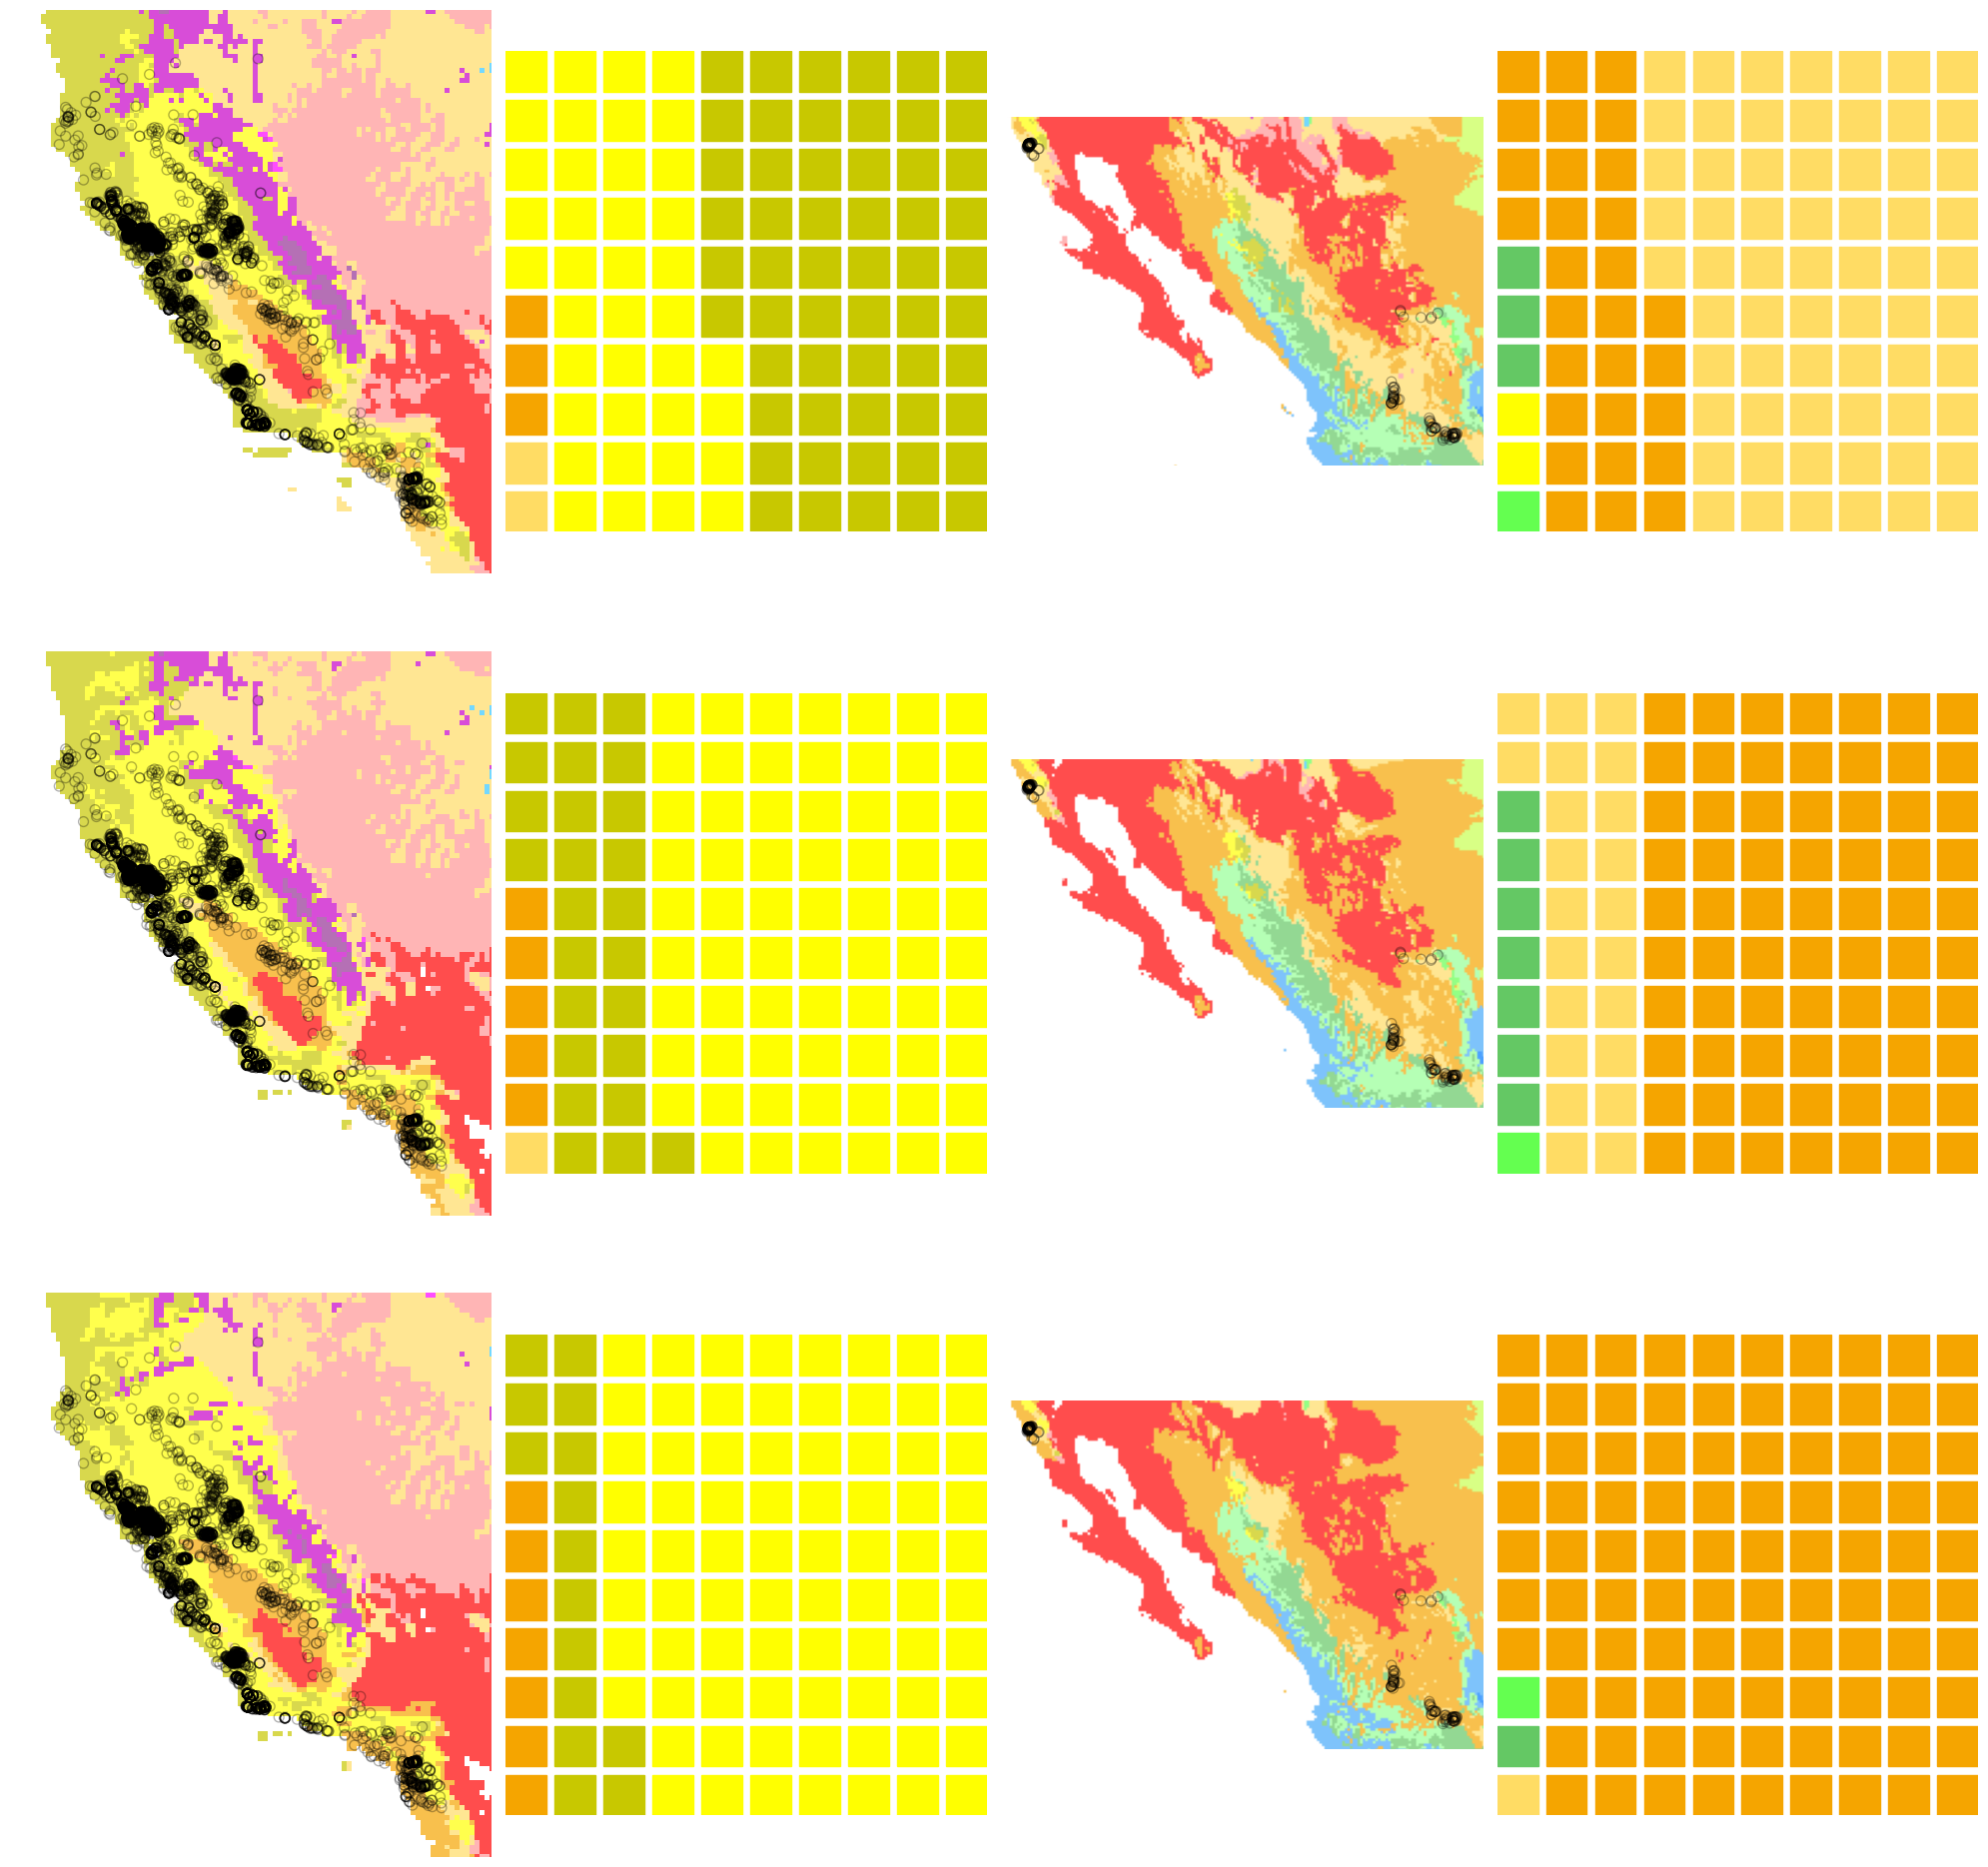

In [8]:
fig = plt.figure(figsize=(20,20))
ca_pad = 10
mex_pad = 10
pt_s = 50
pt_a = 0.3
map_alpha = 0.7

###############
### CURRENT ###
###############

plt.subplot(3,4,1)
im = Image.open('current_map.tif')
plt.imshow(im, alpha=map_alpha)
plt.xlim((west_ca-ca_pad, east_ca+ca_pad))
plt.ylim((south_ca+ca_pad, north_ca-ca_pad))
plt.scatter(just_ca["x"], just_ca["y"], edgecolors="k", s=pt_s, alpha=pt_a, facecolors="none")
plt.axis("off")

ax2 = fig.add_subplot(3,4,2)
ax2.set_aspect(aspect="equal")
Waffle.make_waffle(
    ax=ax2,
    rows=10,
    columns=10, 
    values=curr_map_table_ca["frequency"].tolist(),
    colors=curr_map_table_ca["curr_map_colors"].tolist()
)

plt.subplot(3,4,3)
im = Image.open('current_map.tif')
plt.imshow(im, alpha=map_alpha)
plt.xlim((west_mex-mex_pad, east_mex+mex_pad))
plt.ylim((south_mex+mex_pad, north_mex-mex_pad))
plt.scatter(just_mex["x"], just_mex["y"], edgecolors="k", s=pt_s, alpha=pt_a, facecolors="none")
plt.axis("off")

ax4 = fig.add_subplot(3,4,4)
ax4.set_aspect(aspect="equal")
Waffle.make_waffle(
    ax=ax4,
    rows=10,
    columns=10, 
    values=curr_map_table_mex["frequency"].tolist(),
    colors=curr_map_table_mex["curr_map_colors"].tolist()
)

######################
### SSP1 2041-2070 ###
######################

plt.subplot(3,4,5)
im = Image.open('2041_2070_ssp1_rf19.tif')
plt.imshow(im, alpha=map_alpha)
plt.xlim((west_ca-ca_pad, east_ca+ca_pad))
plt.ylim((south_ca+ca_pad, north_ca-ca_pad))
plt.scatter(just_ca["x"], just_ca["y"], edgecolors="k", s=pt_s, alpha=pt_a, facecolors="none")
plt.axis("off")

ax6 = fig.add_subplot(3,4,6)
ax6.set_aspect(aspect="equal")
Waffle.make_waffle(
    ax=ax6,
    rows=10,
    columns=10, 
    values=ssp1_map_table_ca["frequency"].tolist(),
    colors=ssp1_map_table_ca["curr_map_colors"].tolist()
)

plt.subplot(3,4,7)
im = Image.open('2041_2070_ssp1_rf19.tif')
plt.imshow(im, alpha=map_alpha)
plt.xlim((west_mex-mex_pad, east_mex+mex_pad))
plt.ylim((south_mex+mex_pad, north_mex-mex_pad))
plt.scatter(just_mex["x"], just_mex["y"], edgecolors="k", s=pt_s, alpha=pt_a, facecolors="none")
plt.axis("off")

ax8 = fig.add_subplot(3,4,8)
ax8.set_aspect(aspect="equal")
Waffle.make_waffle(
    ax=ax8,
    rows=10,
    columns=10, 
    values=ssp1_map_table_mex["frequency"].tolist(),
    colors=ssp1_map_table_mex["curr_map_colors"].tolist()
)

######################
### SSP5 2041-2070 ###
######################

plt.subplot(3,4,9)
im = Image.open('2041_2070_ssp5_rf85.tif')
plt.imshow(im, alpha=map_alpha)
plt.xlim((west_ca-ca_pad, east_ca+ca_pad))
plt.ylim((south_ca+ca_pad, north_ca-ca_pad))
plt.scatter(just_ca["x"], just_ca["y"], edgecolors="k", s=pt_s, alpha=pt_a, facecolors="none")
plt.axis("off")

ax10 = fig.add_subplot(3,4,10)
ax10.set_aspect(aspect="equal")
Waffle.make_waffle(
    ax=ax10,
    rows=10,
    columns=10, 
    values=ssp5_map_table_ca["frequency"].tolist(),
    colors=ssp5_map_table_ca["curr_map_colors"].tolist()
)

plt.subplot(3,4,11)
im = Image.open('2041_2070_ssp5_rf85.tif')
plt.imshow(im, alpha=map_alpha)
plt.xlim((west_mex-mex_pad, east_mex+mex_pad))
plt.ylim((south_mex+mex_pad, north_mex-mex_pad))
plt.scatter(just_mex["x"], just_mex["y"], edgecolors="k", s=pt_s, alpha=pt_a, facecolors="none")
plt.axis("off")

ax12 = fig.add_subplot(3,4,12)
ax12.set_aspect(aspect="equal")
Waffle.make_waffle(
    ax=ax12,
    rows=10,
    columns=10, 
    values=ssp5_map_table_mex["frequency"].tolist(),
    colors=ssp5_map_table_mex["curr_map_colors"].tolist()
)

plt.tight_layout()

plt.savefig("climate_maps.png")

# Legend

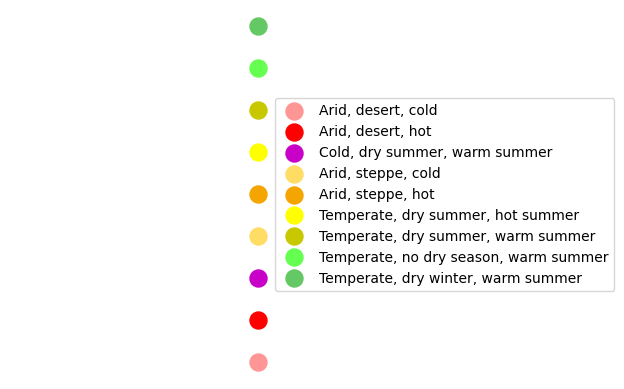

In [9]:
all_tables = pd.concat([curr_map_table_ca, 
                        curr_map_table_mex, 
                        ssp1_map_table_ca, 
                        ssp1_map_table_mex, 
                        ssp5_map_table_ca, 
                        ssp5_map_table_mex
                       ], ignore_index=True)

all_tables = all_tables[["curr_map_climate", "curr_map_colors"]]

all_tables = all_tables.drop_duplicates()

no_duplicates = all_tables.drop_duplicates()

size = 150
for i in range(len(no_duplicates)):
    plt.scatter(0, 
                i, 
                s=size, 
                c=no_duplicates["curr_map_colors"].iloc[i], 
                label=no_duplicates["curr_map_climate"].iloc[i])
plt.legend(loc='center left', bbox_to_anchor=(0.52, 0.5))
plt.axis("off")
    
plt.savefig("climate_legend.png")